<a href="https://colab.research.google.com/github/brenoslivio/SME0828_DataScience/blob/master/Projects/3%20-%20Classifica%C3%A7%C3%A3o/Projeto3_Classificacao_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SME0828 - Introdução à Ciência de Dados
# Projeto 3: Classificação 

### Alunos

Aline Fernanda da Conceição, Nº USP: 9437275

Breno Lívio Silva de Almeida, Nº USP: 10276675

Matheus Victal Cerqueira, Nº USP: 10276661

***Universidade de São Paulo, São Carlos, Brasil.***

## Exercícios sugeridos para a atividade avaliativa 3

Os seguintes exercícios foram sugeridos para entrega em 03 de novembro de 2020 para a disciplina SME0828 - Ciência de Dados oferecida pelo Instituto de Ciências Matemáticas e de Computação (ICMC) da Universidade de São Paulo (USP), a qual foi ministrada pelo professor Francisco Aparecido Rodrigues. Vamos trabalhar com o conjunto de dados [*Star dataset to predict star types*](https://www.kaggle.com/deepu1109/star-dataset). O dataset tem várias informações sobre características de estrelas como temperatura absoluta, luminosidade relativa, tipos de estrelas, entre outros. Vamos classificar os dados considerando vários classificadores conhecidos.



---



## Sumário

1. Desenvolvimento

  1.1 [Exercício 1](#ex1)

  1.2 [Exercício 2](#ex2)

  1.3 [Exercício 3](#ex3)

  1.4 [Exercício 4](#ex4)

  1.5 [Exercício 5](#ex5)

  1.6 [Exercício 6](#ex6)



---



## Desenvolvimento

### <a name="ex3"></a> 3 - Considere o código abaixo para gerar dados artificialmente.

```
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap=’viridis’, s=50, alpha=0.7)
plt.show(True)
```
### Compare os resultados para os métodos Naive Bayes, Classificador Bayesiano paramétrico e o classificador Bayesiano não-paramétrico, variando o ruído (noise).

Primeiramente, importemos as bibliotecas necessárias para a geração dos dados de interesse e para a sua posterior análise:

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn import datasets

Os dados que serão utilizados no decorrer do deenvolvimento deste exercício são os gerados pelo método [.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) da biblioteca sklearn. Tal método gera dados que tendem a se clusterizar em duas meia-luas conforme seu parâmetro de entrada "noise" (ruído) é diminuido. Para valores maiores de ruído, os valores tendem a se embaralhar, dificultando a classificação em um dos dois grupos existentes. Abaixo, temos um exemplo de conjunto de dados gerado pelo método.

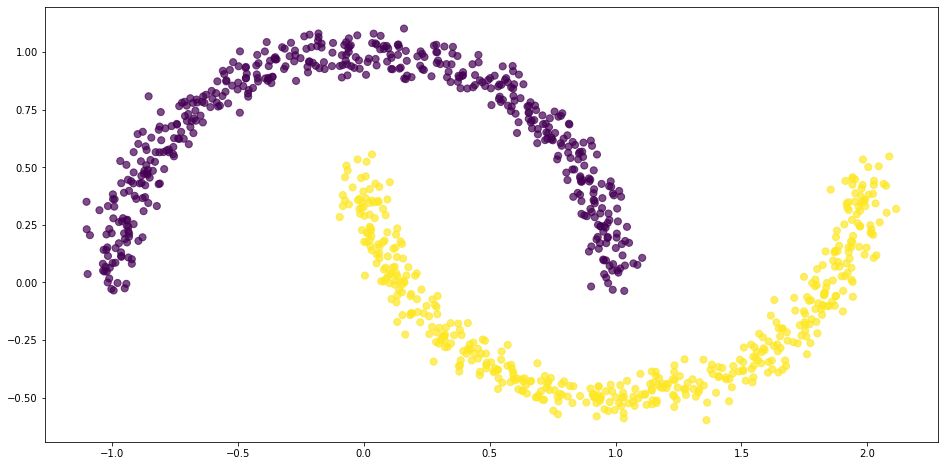

In [9]:
plt.figure(figsize=(16,8))

n_samples = 1000 #número de pontos gerados 
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0] #conjunto de dados a serem classificados 
y = data[1] #classes representados por 0 ou 1 (vetor com classificação dos dados de X)
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", s=50, alpha=0.7)
plt.show(True)

Como é notório acima, o conjunto de dados tende a se agrupar em duas classes: uma representada pelos pontos amarelos e outra pelos pontos roxos. O ruído no exemplo é baixo (0,05), por este fato, a separação entre os grupos é bem nítida e o padrão pode ser reconhecido pelos olhos humanos. A matriz X contém as coordenadas bidimencionais dos pontos gerados pelo método .make_moons e o vetor y contém a classificação de cada ponto como sendo 0 ou 1. Vejamos agora o que ocorre caso o rúido seja relativamente alto.

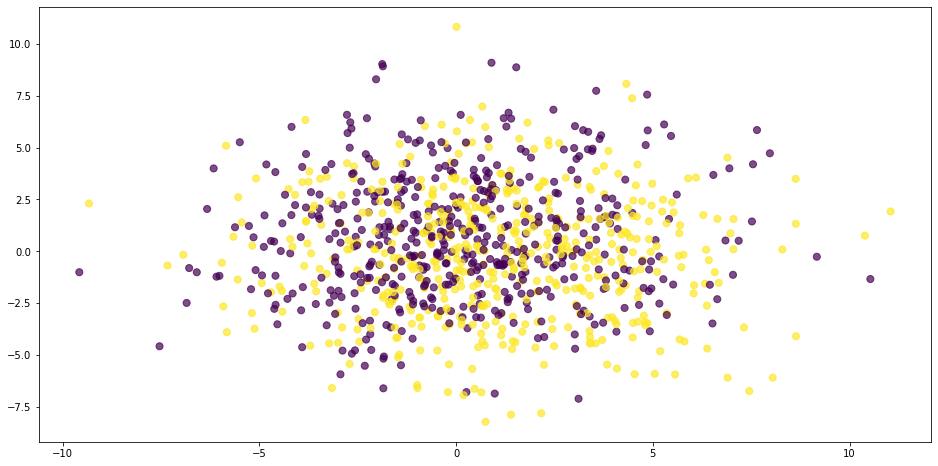

In [16]:
plt.figure(figsize=(16,8))

n_samples = 1000 #número de pontos gerados 
data  = datasets.make_moons(n_samples=n_samples, noise=3)
X = data[0] #conjunto de dados a serem classificados 
y = data[1] #classes representados por 0 ou 1 (vetor com classificação dos dados de X)
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", s=50, alpha=0.7)
plt.show(True)

Com um ruiído de valor 3 o padrão de classificação é perdido de um ponto de vista visual e a classificação de cada ponto torna-se uma tarefa muito mais complicada. Para uma melhor demonstração da situação aqui descrita, imagine que lhe ofereceram os seguintes gráficos de dispersão e te contaram que existem dois grupos de pontos que são semelhantes entre si de alguma forma e pedissem para você classificar cada um desses pontos em um dos dois grupos (da forma como estão classificados nos gráficos acima): 

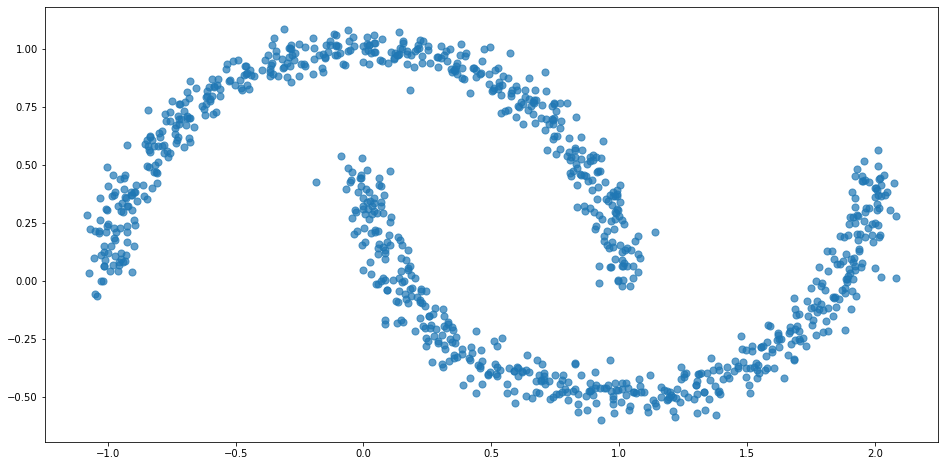

In [17]:
plt.figure(figsize=(16,8))

n_samples = 1000 #número de pontos gerados 
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0] #conjunto de dados a serem classificados 
y = data[1] #classes representados por 0 ou 1 (vetor com classificação dos dados de X)
plt.scatter(X[:,0], X[:,1], cmap="viridis", s=50, alpha=0.7)
plt.show(True)

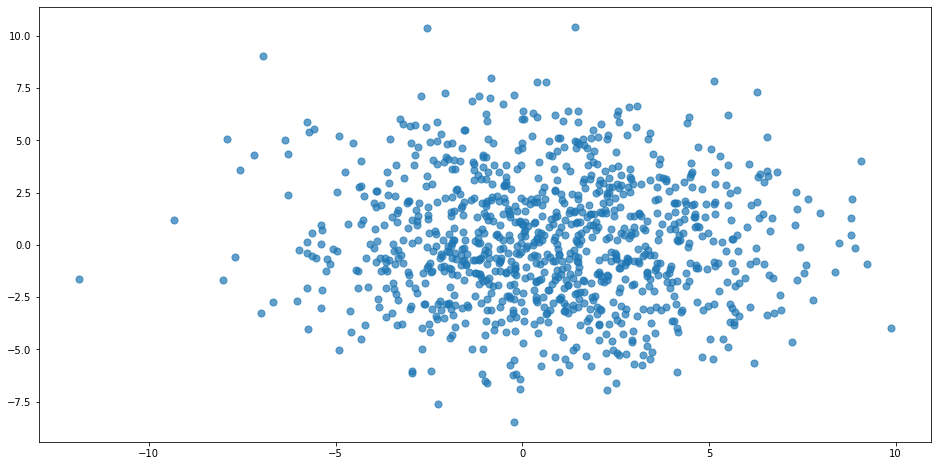

In [19]:
plt.figure(figsize=(16,8))

n_samples = 1000 #número de pontos gerados 
data  = datasets.make_moons(n_samples=n_samples, noise=3)
X = data[0] #conjunto de dados a serem classificados 
y = data[1] #classes representados por 0 ou 1 (vetor com classificação dos dados de X)
plt.scatter(X[:,0], X[:,1], cmap="viridis", s=50, alpha=0.7)
plt.show(True)

Os gráficos foram gerados com os mesmos níveis de ruído que os dois primeiros, mas não foi oferecida a separação entre os grupos com cores. Decifrar o padrão do primeiro gráfico apenas visualmente é uma tarefa relativamente simples, já que o padrão é claro visualmente. Agora, classificar os pontos do gráfico com maior ruído é uma tarefa praticamente impossível de um ponto de vista visual. É deste conceito que surge o fato deste gerador de dados ser interessante para um primeiro teste de algoritmos de classificação, como o que iremos performar neste desenvolvimento.

A ideia é comparar os algoritmos de classificação: Naive-Bayes, classificador bayesiano paramétrico e classificador bayesiano não paramétrico, por meio de sua performance na classificação de dados gerados pelométodo make_moons com diferentes níveis de ruído. Para tal, serão criadas algumas funções que irão facilitar esta comparação de um ponto de vista prático.

### Geração e preparação dos dados

Primeiramente, criemos uma função para a geração dos dados por meio do make_moons de uma maneira simples. A função irá receber os parâmetros n (número de pontos gerados) e ruido (ruído ou "noise" para a geração) e irá devolver a matriz X com as coordenadas bidimencionais dos pontos gerados e o vetor y com a classificação de cada ponto.

In [73]:
def geracao_dados(n, ruido):
    data  = datasets.make_moons(n_samples=n, noise=ruido)
    X = data[0] #conjunto de dados a serem classificados 
    y = data[1] #classes representados por 0 ou 1 (vetor com classificação dos dados de X)
    
    return X,y

Com os dados em mãos, precisa-se normalizar os dados e separá-los em conjuntos de treino e de teste. Para tal, criou-se a função preparacao_dados a qual recebe os parâmetros "treino" (fração do conjunto de dados que será colocado no conjunto de treino e ajuste, sendo claramente um valor entre 0 e 1), "semente" (valor de seed para a seleção aleatória dos dados em conjuntos de treino e teste), X (matriz com as coordenadas bidimencionais dos pontos gerados) e y (vetor y com a classificação de cada ponto) e retorna os conjuntos x_train, y_train (conjuntos de treino) e x_test, y_test (conjuntos de teste).

In [74]:
def preparacao_dados(treino, semente, X, y):
    import warnings
    warnings.filterwarnings("ignore")

    random.seed(semente)

    # As classes para a classificação são 0 ou 1, ou seja, os dados de X podem ser calssificados como 0 ou 1 
    classes = np.array([0,1])

    # Normalização dos dados 
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    # Divisão do conjunto de dados em conjunto de treinamento e conjunto de teste
    p = treino # fração de elementos no conjunto de treino 
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = semente)
    return x_train, x_test, y_train, y_test

A função gerador_preparados é uma combinação das duas funções acima declaradas, a qual simplifica a geração e preparação dos dados em um comando simultâneo caso seja conveniente.

In [75]:
def gerador_preparador(n, semente, ruido, treino):
    
    X,y = geracao_dados(n,ruido)
    x_train, x_test, y_train, y_test = preparacao_dados(treino, semente, X,y)
    return x_train, x_test, y_train, y_test

### Classificador Bayesiano Paramétrico

O primeiro classificador aqui discutido é o Classificador Bayesiano Paramétrico. Tal clasificador utiliza das propriedades do Teorema de Bayes para determianr qual classe tem a maior probabilidade de ser a classe de cada ponto analisado. Assim, é um método que se em estimação por máxima verossimilhança. Para realizar a classificação, o método presume que cada classe é normalmente distribuida (o que o torna paramétrico) e por meio do Teorema de Bayes, obtém-se a probabilidade de cada ponto amostral pertencer a cada classe. Assim, cada ponto é considerado ser da classe mais verossímil (provável) e assim realiza-se a classificação. A função abaixo declarada contém a implementação de tal método e retorna a acurácia obtida considerando-se os conjuntos de treinamento e de teste que ela recebe.

In [76]:
def bayes_parametrico(x_train, x_test, y_train, y_test, classes):
    # Declaração para a matriz que irá armazenar as probabilidades para cada classe

    P = pd.DataFrame(data=np.zeros((x_train.shape[0], len(classes))), columns = classes) 

    # (Repare que tal matriz apresenta o mesmo número de linhas que x_train e o número de classes como número de 
    # colunas, assim poderá armazenar a probabilidade de cada ponto observado pertencer a classe 0 ou 1)

    Pc = np.zeros(len(classes)) # Armazenamento da fração de elementos em cada classe (no caso, é um vetor 1x2)


    for i in np.arange(0, len(classes)): # Iteração no número de classes
        elem = tuple(np.where(y_train == classes[i])) # Obtenção de tupla correspondente à freq de elem da classe i
        Pc[i] = len(elem)/len(y_train) # Probabilidade de pertencer a classe i (no caso, 0 ou 1)
        Z = x_train[elem,:][0] # Elementos presentes no conjunto de treinamento
        m = np.mean(Z, axis = 0) # Vetor de médias
        cv = np.cov(np.transpose(Z)) # Matriz de variâncias e covariâncias
        for j in np.arange(0,x_test.shape[0]): # Iteração para as observações no conjunto de teste
            x = x_test[j,:]
            # Obtenção da probabilidade de pertencer a cada classe (conjunto teste)
            pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True) # Modelagem em uma distribuição
            # normal multivariada (Classificador Bayesiano Paramétrico)
            P[classes[i]][j] = pj*Pc[i] # posteriori proporcional a verossimilhança x priori (Teorema de Bayes)

    y_pred = [] # Declaração do vetor que irá armazenar as classes preditas 
    for i in np.arange(0, x_test.shape[0]): # Iteração em len(número de colunas de x_test)
        c = np.argmax(np.array(P.iloc[[i]])) # Identificador (encontra a probabilidade a posteriori com maior valor)
        y_pred.append(classes[c]) # Classificador (classifica os dados de x_test)

    # Obtenção da acurácia
    score = accuracy_score(y_pred, y_test) #Obtém a acurácia do classificador 
    
    return score

### Classificador Bayesiano Não Paramétrico

O conceito do método do classificador bayesiano não paramétrico é o mesmo do caso paramétrico, a diferença está em como consideramos a distribuição dos elementos em cada classe. Aqui, cria-se uma função densiade utilizando-se denuma função kernel, a qual modelará o comportamento da dsitribuição dos elementos em cada classe.

In [77]:
def bayes_n_parametrico(x_train, x_test, y_train, y_test, classes):
    from sklearn.neighbors import KernelDensity
    
    # Declaração para a matriz que irá armazenar as probabilidades para cada classe

    P = pd.DataFrame(data=np.zeros((x_train.shape[0], len(classes))), columns = classes) 

    # (Repare que tal matriz apresenta o mesmo número de linhas que x_train e o número de classes como número de 
    # colunas, assim poderá armazenar a probabilidade de cada ponto observado pertencer a classe 0 ou 1)

    Pc = np.zeros(len(classes)) # Armazenamento da fração de elementos em cada classe (no caso, é um vetor 1x2)
    

    h = 2
    for i in np.arange(0, len(classes)): # Iteração no número de classes
        elem = tuple(np.where(y_train == classes[i])) # Obtenção de tupla correspondente à freq de elem da classe i
        Pc[i] = len(elem)/len(y_train) # Probabilidade de pertencer a classe i (no caso, 0 ou 1)
        Z = x_train[elem,:][0] # Elementos no conjunto de treinamento
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z) # obtenção da dsitribuição multivariada dos 
        for j in np.arange(0,x_test.shape[0]): # Iteração para as observações no conjunto de teste
            x = x_test[j,:]
            x = x.reshape((1,len(x)))
            # Obtenção da probabilidade de pertencer a cada classe (conjunto teste)
            pj = np.exp(kde.score_samples(x)) # Atribuição de probabilidades baseado na distribuição kde
            P[classes[i]][j] = pj*Pc[i] # posteriori proporcional a verossimilhança x priori (Teorema de Bayes)

    y_pred = [] # Declaração do vetor que irá armazenar as classes preditas 
    for i in np.arange(0, x_test.shape[0]): # Iteração em len(número de colunas de x_test)
        c = np.argmax(np.array(P.iloc[[i]])) # Identificador (encontra a probabilidade a posteriori com maior valor)
        y_pred.append(classes[c]) # Classificador (classifica os dados de x_test)

    # Obtenção da acurácia
    score = accuracy_score(y_pred, y_test) #Obtém a acurácia do classificador 
    
    
    return score

### Classificador Naive-Bayes

O classificador Naive-Bayes está implementado na biblioteca sklearn, e iremos utilizar tal função implementada, a [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html). A principal diferença aqui utilizada é a condição de que os atributos de cada observação dão independentes.

In [78]:
def naive_bayes(x_train, x_test, y_train, y_test):
    from sklearn.naive_bayes import GaussianNB
    from sklearn import metrics

    model = GaussianNB()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    
    return score

Assim, tendo-se os algoritmos de classificação em cada uma das funções declaradas acima, pode-se criar uma função que obtém a acurácia para cada um dos algoritmos considerando-se conjuntos de treino e teste obtidos pela função gerador_preparador.

In [79]:
def comparativo_bayes(x_train, x_test, y_train, y_test, classes):
    
    score1 = bayes_parametrico(x_train, x_test, y_train, y_test, classes)
    score2 = bayes_n_parametrico(x_train, x_test, y_train, y_test, classes)
    score3 = naive_bayes(x_train, x_test, y_train, y_test)
    
    return score1, score2, score3

Agora, façamos uma comparação mais organizada e assertiva para entendermos como tais classificadores se comportam quando deparados com o conjunto de dados de interesse, segue abaixo um teste:

In [80]:
n = 10000 # 10000 amostras
ruido = .09 # valor do ruído
# As classes para a classificação são 0 ou 1, ou seja, os dados de X podem ser calssificados como 0 ou 1 
classes = np.array([0,1])
semente = 19
treino = 0.8

x_train, x_test, y_train, y_test = gerador_preparador(n, semente, ruido, treino)

Façamos um teste considerando-se tais especificações.

In [81]:
score1,score2,score3 = comparativo_bayes(x_train, x_test, y_train, y_test, classes)

print('Acurácia Bayesiano Paramétrico:', score1)
print('Acurácia Bayesiano Não Paramétrico:', score2)
print('Acurácia Naive-Bayes:', score3)

Acurácia Bayesiano Paramétrico: 0.8765
Acurácia Bayesiano Não Paramétrico: 0.8645
Acurácia Naive-Bayes: 0.8765


É notório qye os algoritmos obtiveram acurácias relativamente altas e não muito diferentes entre si. Agora, vamos estudar como tais classificadores se comportam conforme variamos o ruído.

In [82]:
n = 1000 # 10000 amostras
# As classes para a classificação são 0 ou 1, ou seja, os dados de X podem ser calssificados como 0 ou 1 
classes = np.array([0,1])
semente = 19
treino = 0.8

In [107]:
vpassos = [] #vetor que armazena os valores dos ruidos (passos)
vNB = [] #vetor que armazena os valores da acurácia obtidos pelo método Beyesiano Paramétrico
vBNP = [] #vetor que armazena os valores da acurácia obtidos pelo método Beyesiano Não Paramétric0
vBP = [] #vetor que armazena os valores da acurácia obtidos pelo método Naive-Bayes

for i in np.arange(0,3, 0.02): #iteração para os valores do ruído, de 0 a 3 com passos de 0,05
    
    ruido = i
        
    x_train, x_test, y_train, y_test = gerador_preparador(n, semente, ruido, treino)
    score1,score2,score3 = comparativo_bayes(x_train, x_test, y_train, y_test, classes)
    
    
    vBP.append(score1)
    vBNP.append(score2)
    vNB.append(score3)
    vpassos.append(i)

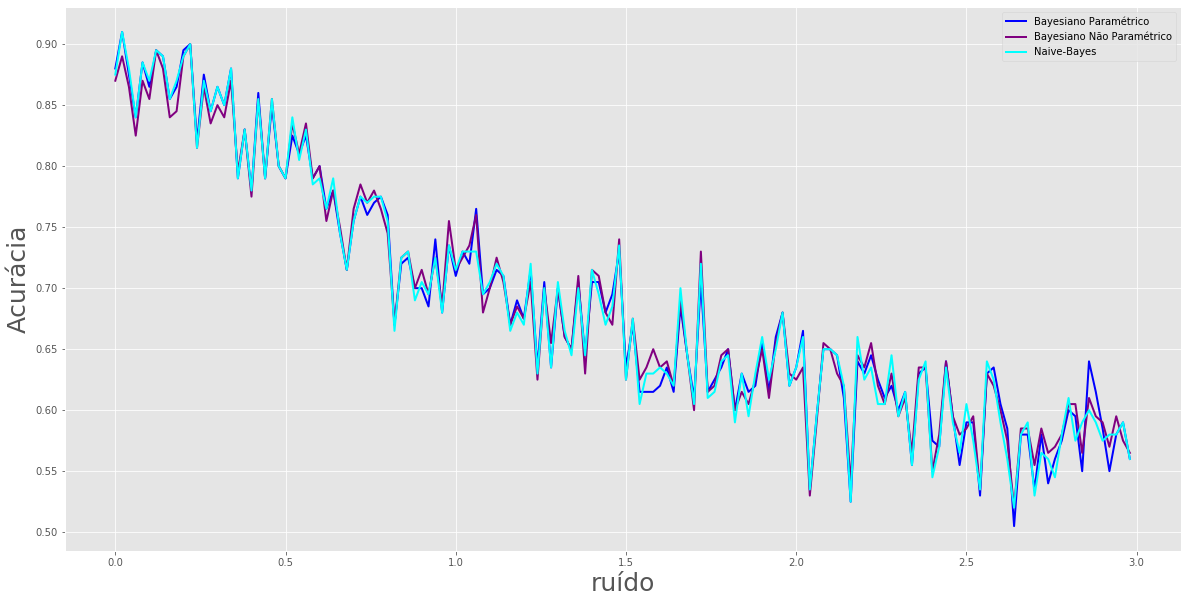

In [108]:
#estilo de gráfico para o matplotlib
plt.style.use('ggplot')

plt.figure(figsize=(20,10))
plt.plot(vpassos, vBP, linestyle='-', color="blue", linewidth=2,label = 'Bayesiano Paramétrico')
plt.plot(vpassos, vBNP, linestyle='-', color="purple", linewidth=2,label = 'Bayesiano Não Paramétrico')
plt.plot(vpassos, vNB, linestyle='-', color="cyan", linewidth=2,label = 'Naive-Bayes')
plt.ylabel("Acurácia", fontsize=25)
plt.xlabel("ruído", fontsize=25)
plt.legend()
plt.show(True) 

O gráfico acima mostra acurácia dos classificadores conforme variamos o ruído na geração dos dados. Como esperado, quando maior o ruído, menor a acurácia, pois a divisão entre os dados se torna cada vez menos nítida. Mas é interessante notar que os 3 métodos são extremamente semelhantes de um ponto de vista de acurácia, sendo que eles nunca se distanciam em mais de 5% de acerto. Dessa forma, para aplicações mais rápidas e que demandam menos precisão, provavelmente qualquer um dos 3 métodos será interessante para a abordagem do problema. MAs quando a aplicação demanda alta precisão, é interessante anaisar o problema de forma mais minuciosa de um ṕontod e vista estatístico para decidir quais suposições são mais interessantes para modelar o problema. A distribuição dos dados pode ser considerada normal? Talvez um teste de [Shapiro-Wilk](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) seja interessante para verificar com qual nível de significância podemos afirmar isso. Os componentes das observações são independentes? Entre outras perguntas, podem ajudar a escolher o melhor modelo. Para aplicações com poucos dados, pode-se ajustar os três modelos e fazer um teste de qual tem a melhor acurácia. Mas para grandes bancos de dados, é interessante ter mais noção de quais condições podemos considerar e qual método seria o melhor candidado para desprender-se tempo e esforço em cima.

### <a name="ex4"></a> 4 - Considerando os dados artificiais do exercício anterior, mostre as regiões de separação para os métodos Naive Bayes, k-vizinhos e regressão logística.

In [47]:
from mlxtend.plotting import plot_decision_regions

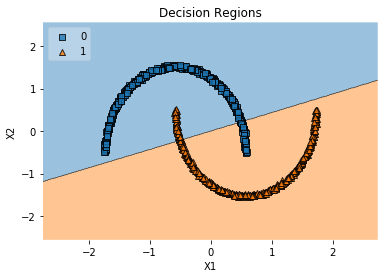

In [48]:


# Training a classifier
model = GaussianNB()
model.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()

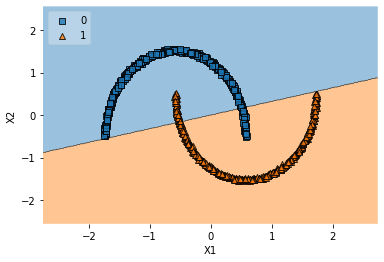

In [49]:
from sklearn.linear_model import LogisticRegression

# Training a classifier
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.savefig('logistic-region.eps')
plt.show()

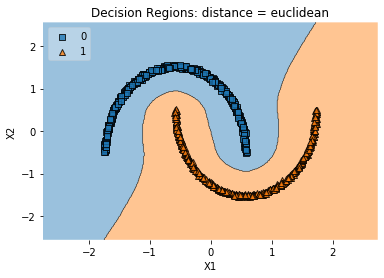

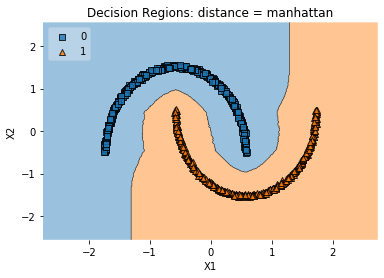

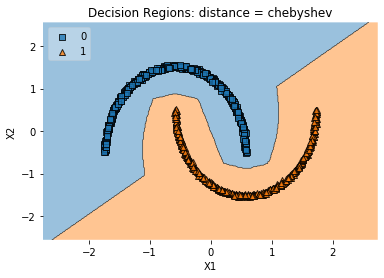

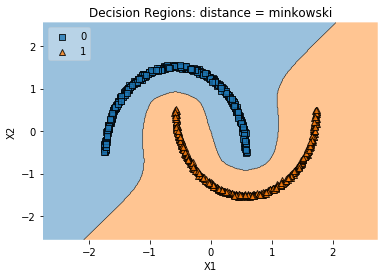

In [50]:
from sklearn.neighbors import KNeighborsClassifier

vm = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k = 21
for d in vm:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = d, p=3)
    model.fit(X, y)
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: distance = '+ d)
    #plt.savefig('knn_' + str(d)+'.eps')
    plt.show()